<a href="https://colab.research.google.com/github/BabyFace-Creation/PCVK-Genap-20-21/blob/main/Jobsheet3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

Masukkan Nilai Brightness : 50


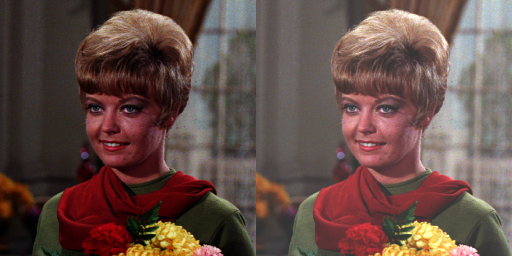

In [6]:
try :
  brightness = int(input('Masukkan Nilai Brightness : '))
except ValueError :
  print('Number Error')

original = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

for y in range (original.shape[0]):
  for x in range (original.shape[1]):
    for c in range (original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)


Masukkan Nilai Brightness : 60
Masukkan Nilai Kontras : 1.5


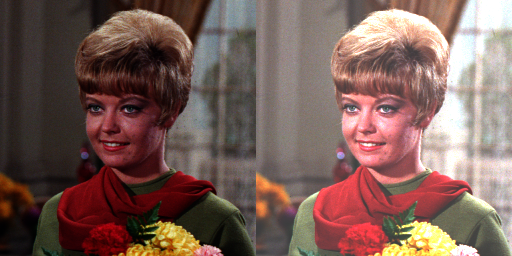

In [8]:
try :
  brightness = int(input('Masukkan Nilai Brightness : '))
  contrast = float(input('Masukkan Nilai Kontras : '))
except ValueError :
  print('Number Error')

original = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

for y in range (original.shape[0]):
  for x in range (original.shape[1]):
    for c in range (original.shape[2]):
      brightness_image[y,x,c] = np.clip(contrast*original[y,x,c] + brightness, 0, 255)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)


Masukkan Nilai Brightness : 40


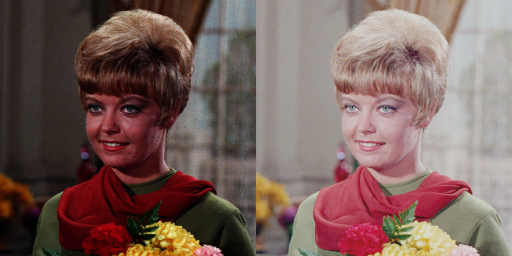

In [9]:
try :
  brightness = int(input('Masukkan Nilai Brightness : '))
except ValueError :
  print('Number Error')

original = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/female.tiff')
brightness_image = brightness * (np.log(original + 1))
brightness_image = np.array(brightness_image, dtype = np.uint8)


final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

In [24]:
def rgb_to_gray_luminance(img):
        grayImage = np.zeros(img.shape)
        R = np.array(img[:, :, 0])
        G = np.array(img[:, :, 1])
        B = np.array(img[:, :, 2])

        R = (R *.299)
        G = (G *.587)
        B = (B *.114)

        Avg = (R+G+B)
        grayImage = img.copy()

        for i in range(3):
           grayImage[:,:,i] = Avg
           
        return grayImage

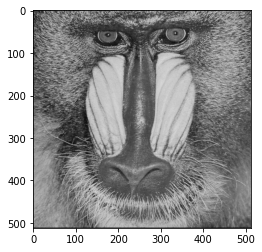

In [25]:
original = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/mandrill.tiff')

grayImage = rgb_to_gray_luminance(original)  
plt.imshow(grayImage)

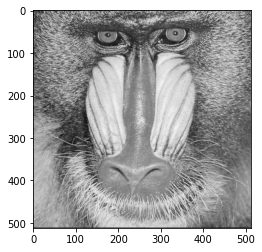

In [64]:
original = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/mandrill.tiff')
fix_img = cv.cvtColor(original, cv.COLOR_BGR2RGB)
plt.imshow(fix_img)

R, G, B = fix_img[:,:,0], fix_img[:,:,1],fix_img[:,:,2]

grayscale_average_img = np.mean(fix_img, axis=2)
plt.imshow(grayscale_average_img, cmap='gray')

In [49]:
def rgb_to_gray_min_max(img):
        grayImage = np.zeros(img.shape)
        R = np.array(img[:, :, 0])
        G = np.array(img[:, :, 1])
        B = np.array(img[:, :, 2])

        max = np.maximum(np.maximum(R,G),B)
        min = np.minimum(np.minimum(R,G),B)

        grayImage = max/2 + min/2

           
        return grayImage

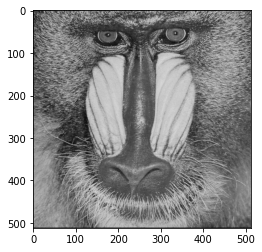

In [50]:
original = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/mandrill.tiff')

#grayImage = rgb_to_gray_min_max(original)  
plt.imshow(grayImage)
plt.show()

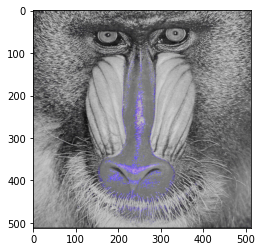

In [36]:
original = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/mandrill.tiff')

height, width, channels = original.shape

hsv = cv.cvtColor(original, cv.COLOR_BGR2HSV)
gray = cv.cvtColor(original, cv.COLOR_BGR2GRAY)

lower_red = np.array([160,55,55])
upper_red = np.array([180,255,255])

mask = cv.inRange(hsv, lower_red, upper_red)
mask_inv = cv.bitwise_not(mask)
res = cv.bitwise_and(original, original, mask=mask)
background = cv.bitwise_and(gray, gray, mask = mask_inv)
background = np.stack((background,)*3, axis=-1)
img_ca = cv.add(res, background)

plt.imshow(img_ca)


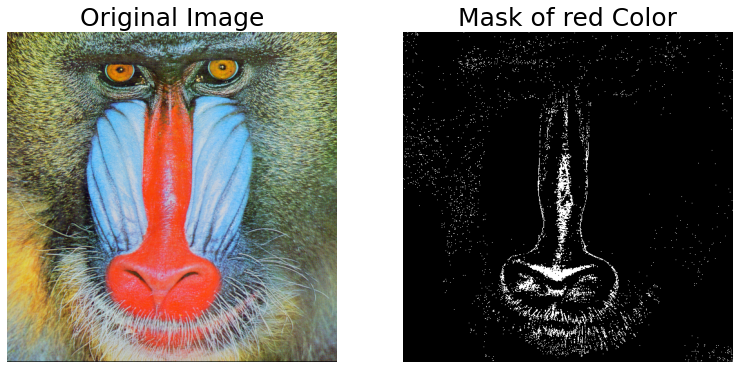

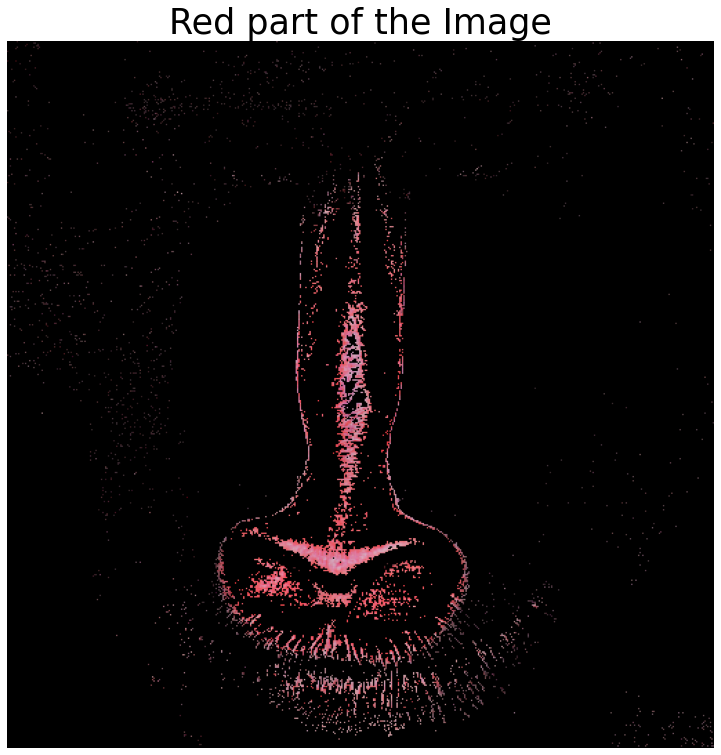

In [47]:
original = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/mandrill.tiff')
hsv = cv.cvtColor(original, cv.COLOR_BGR2HSV)
 
# define range of red color in HSV
lower_red = np.array([160,50,50])
upper_red = np.array([180,255,255])
     
# Threshold the HSV image using inRange function to get only red colors
mask = cv.inRange(hsv, lower_red, upper_red)
 
plt.figure(figsize=[13,13])
plt.subplot(121);plt.imshow(original[:,:,::-1]);plt.title("Original Image",fontdict={'fontsize': 25});plt.axis('off');
plt.subplot(122);plt.imshow(mask, cmap='gray');plt.title("Mask of red Color",fontdict={'fontsize': 25});plt.axis('off');
res = cv.bitwise_and(original,original, mask= mask)
plt.figure(figsize=[13,13])
plt.imshow(res[:,:,::-1]);plt.title("Red part of the Image",fontdict={'fontsize':35});plt.axis('off');



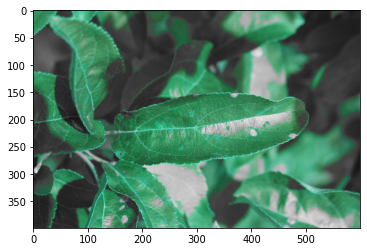

In [45]:
original = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/leave.png')

gray = cv.cvtColor(original, cv.COLOR_BGR2GRAY)
gray = cv.merge([gray, gray, gray])
hsv = cv.cvtColor(original, cv.COLOR_BGR2HSV)
lower = np.array([35, 90, 88])
upper = np.array([179, 255, 255])
mask = cv.inRange(hsv, lower, upper)
colored_output = cv.bitwise_and(original, original, mask=mask)
gray_output = cv.bitwise_and(gray, gray, mask=255-mask)
result = cv.add(colored_output, gray_output)

plt.imshow(result)
